In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.feature_selection import f_classif

%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

#### Vamos a cargar test

In [3]:
# cargamos datos
test_data = pd.read_csv("./test.csv", sep=';') # cargamos fichero
# test_data.columns = test_data.columns.str.replace(' ', '_').str.lower()
# Cambiamos square_feet a metros cuadrados generando una nueva columna
# train_data['square_meters'] = train_data['square_feet'].apply(lambda x: x * 0.092903)
test_data.head()

,Host Response Rate,Host Listings Count,Host Total Listings Count,Zipcode,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,...,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month,Host Since in Days,First Review in Days,Entire home/apt,Private room,Shared room,Square Meters
0,100.0,2.0,2.0,28004.0,40.425330,-3.703841,2,1.0,1.0,1.0,...,10.0,9.0,2.0,3.47,896.0,793.0,1,0,0,NaN
1,100.0,1.0,1.0,28019.0,40.392494,-3.708362,2,1.0,1.0,1.0,...,NaN,NaN,1.0,NaN,278.0,NaN,0,1,0,NaN
2,NaN,1.0,1.0,28023.0,40.468014,-3.795734,3,1.5,1.0,1.0,...,NaN,NaN,1.0,NaN,1709.0,NaN,1,0,0,NaN
3,NaN,1.0,1.0,28033.0,40.481546,-3.663459,3,2.0,2.0,2.0,...,NaN,NaN,1.0,NaN,1035.0,NaN,1,0,0,NaN
4,100.0,6.0,6.0,28012.0,40.415075,-3.701552,3,1.0,0.0,1.0,...,10.0,10.0,6.0,2.04,720.0,379.0,1,0,0,NaN


#### Test en este punto no sabemos que rayos tiene, así que vamos a poner una vela para que todo salga bien con todas las operaciones que le vamos a pasar en función de lo que hicimos en train

In [4]:
# Volvemos a revisar los porcentajes de nulos
test_data.isna().mean()*100

Host Response Rate                13.897281
Host Listings Count                0.037764
Host Total Listings Count          0.037764
Zipcode                            2.945619
Latitude                           0.000000
Longitude                          0.000000
Accommodates                       0.000000
Bathrooms                          0.226586
Bedrooms                           0.226586
Beds                               0.264350
Price                              0.000000
Weekly Price                      74.924471
Monthly Price                     75.906344
Security Deposit                  57.703927
Cleaning Fee                      41.654079
Guests Included                    0.000000
Extra People                       0.000000
Minimum Nights                     0.000000
Maximum Nights                     0.000000
Availability 30                    0.000000
Availability 60                    0.000000
Availability 90                    0.000000
Availability 365                

In [5]:
# Vamos a ver que dicen los valores
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,2280.0,95.455702,13.738285,0.000000,100.000000,100.000000,100.000000,100.000000
Host Listings Count,2647.0,9.595769,26.710462,0.000000,1.000000,2.000000,5.000000,207.000000
Host Total Listings Count,2647.0,9.595769,26.710462,0.000000,1.000000,2.000000,5.000000,207.000000
Zipcode,2570.0,28015.228016,12.749104,28001.000000,28005.000000,28012.000000,28017.000000,28094.000000
Latitude,2648.0,40.420609,0.019995,40.341195,40.409909,40.418759,40.427782,40.507659
Longitude,2648.0,-3.697413,0.022791,-3.835498,-3.707981,-3.701811,-3.693853,-3.576198
Accommodates,2648.0,3.175604,1.955429,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,2642.0,1.256813,0.614110,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,2642.0,1.298637,0.827714,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,2641.0,1.954563,1.404882,1.000000,1.000000,2.000000,2.000000,16.000000


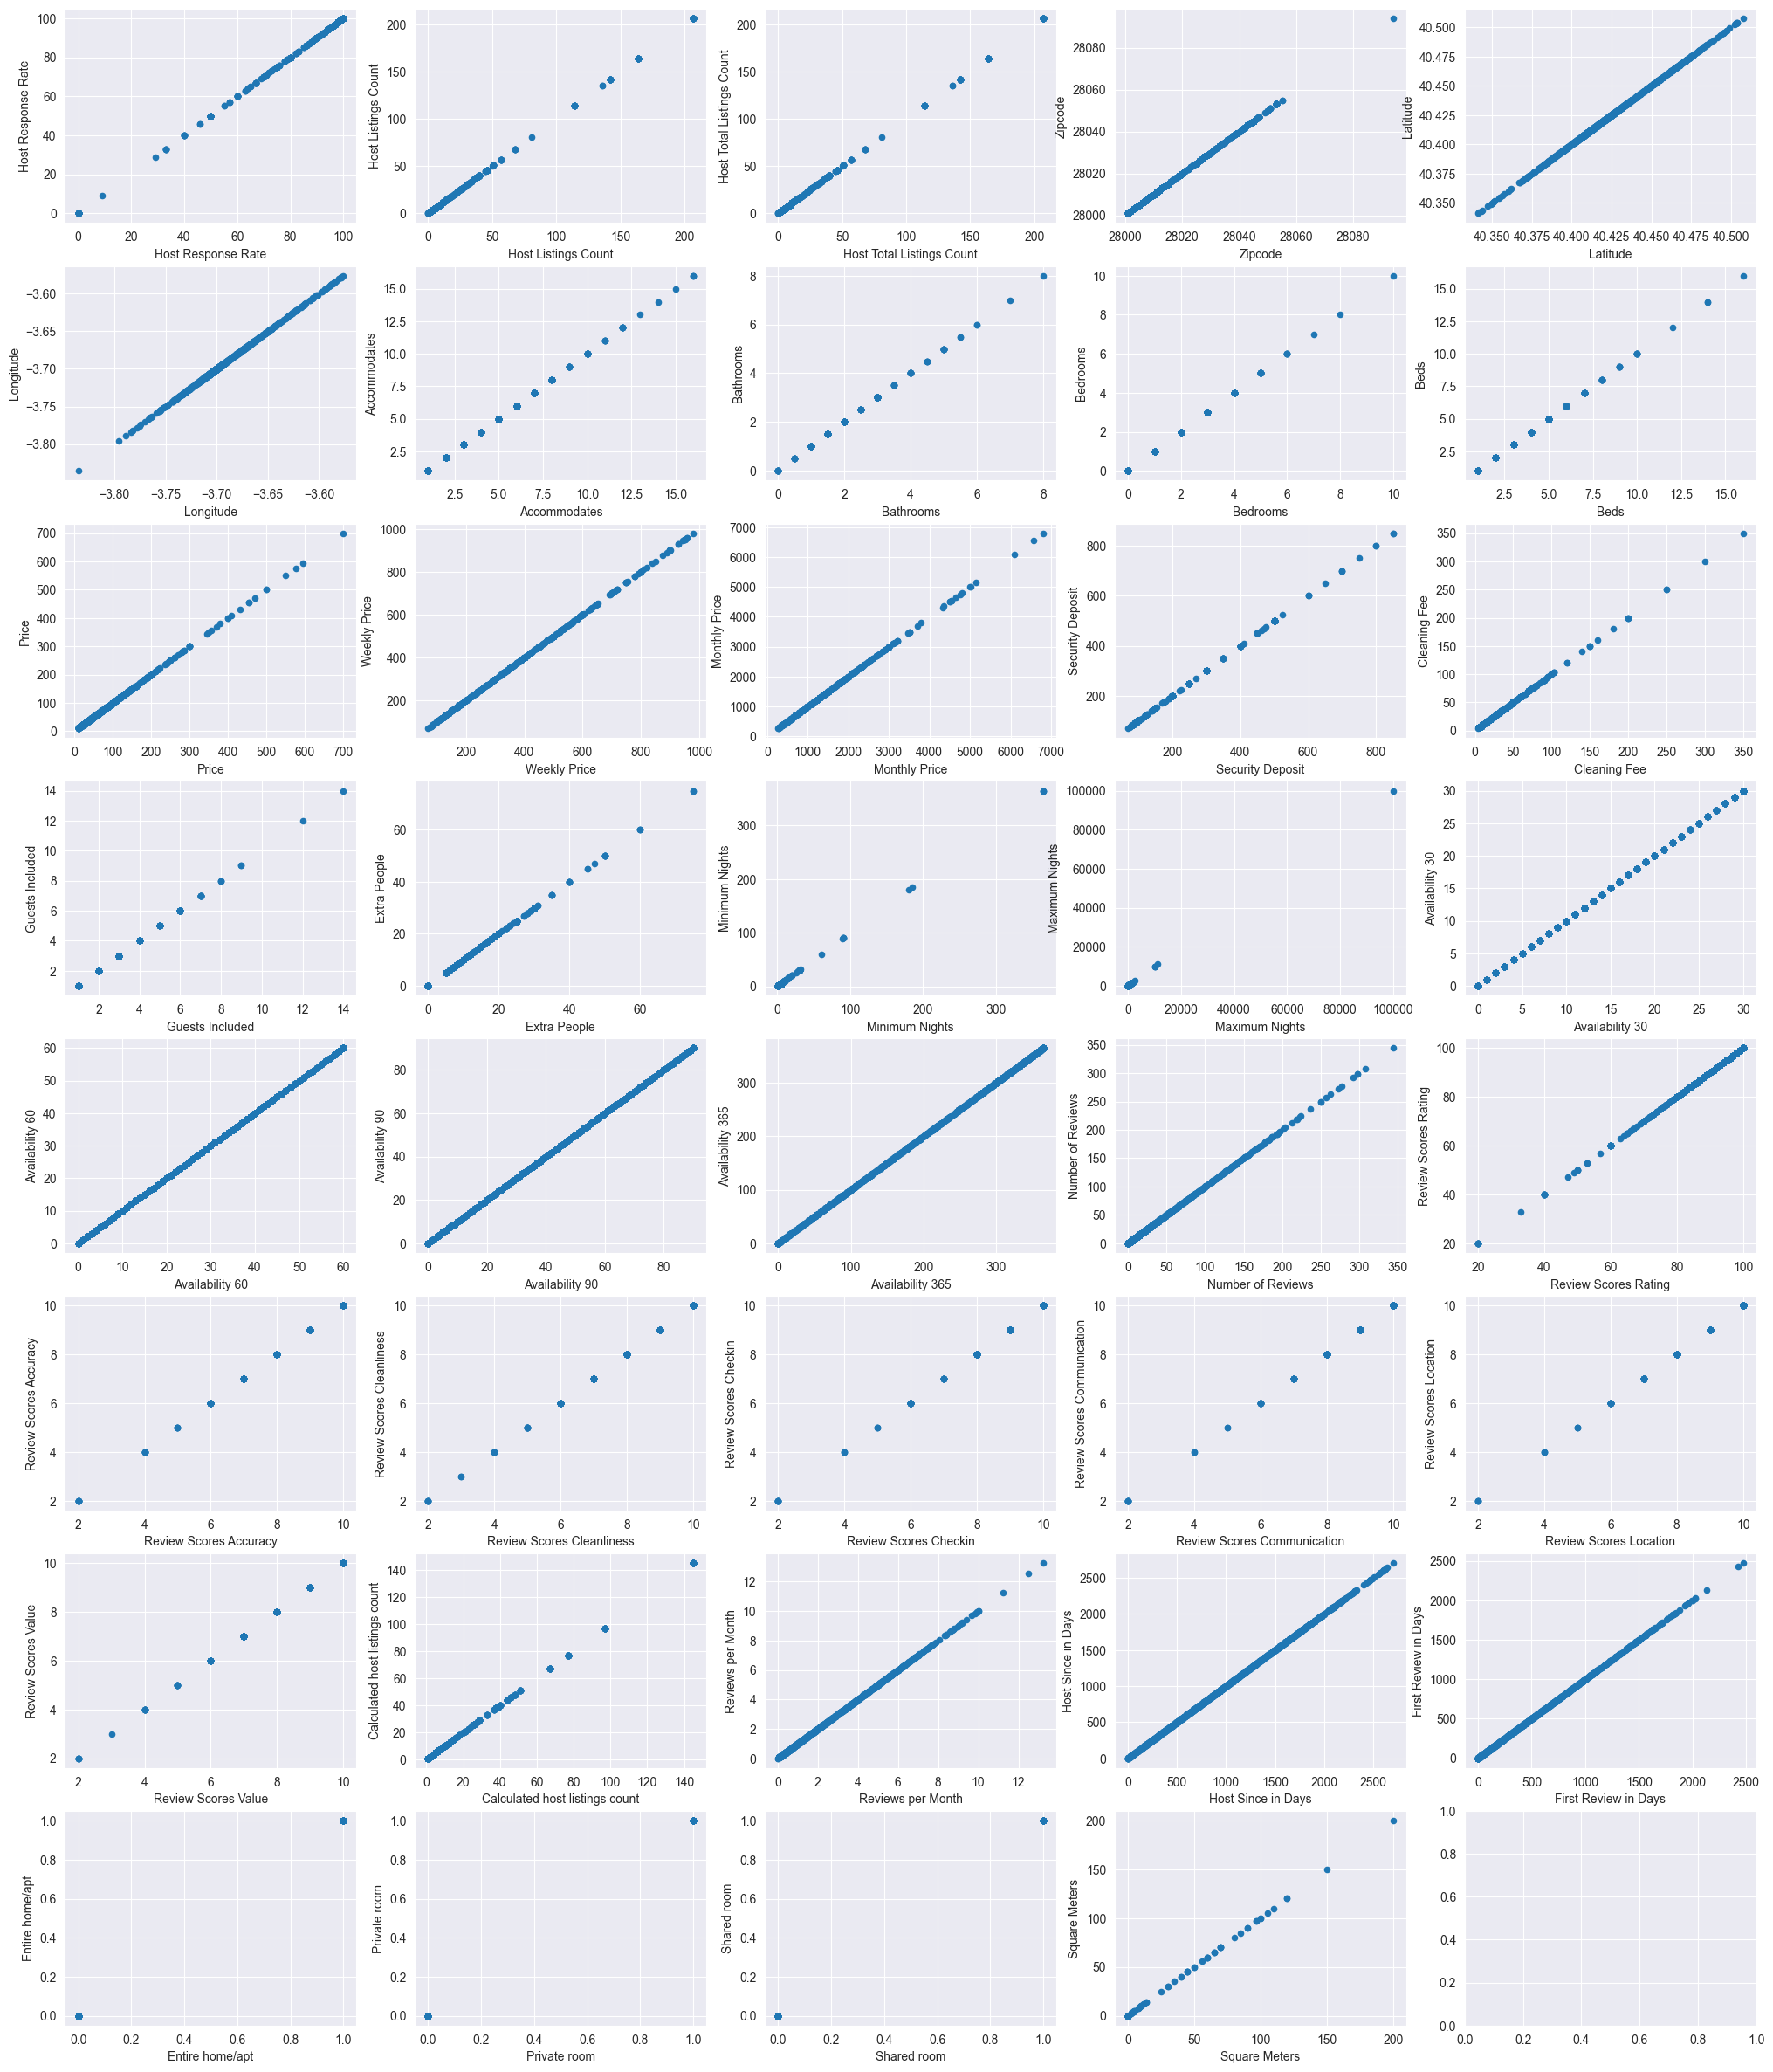

In [6]:
# Vamos a graficar cada columna en scatter para ver si hay outliers, lo vamos a mostrar en subplot
fig, ax = plt.subplots(8, 5, figsize=(25, 30))
for variable, subplot in zip(test_data.columns, ax.flatten()):
    test_data.plot(kind='scatter', x=variable, y=variable, ax=subplot)

In [7]:
# Aplicamos lo mismo que hicimos en train
# Obtenemos las filas del dataframe que, basados en la columna Zipcode, se consideran outliers
outliers = test_data[test_data['Zipcode'] > 99999]
print(outliers.index.to_list())
# Añadir al objeto outliers las filas del dataframe que, basados en la columna Montly Price, se consideran outliers
outliers = outliers.append(test_data[test_data['Monthly Price'] > 7000])
print(outliers.index.to_list())
# Obtenemos las filas del dataframe que, basados en la columna Square Meters, se consideran outliers
outliers = outliers.append(test_data[test_data['Square Meters'] > 300])
# Obtenemos las filas del dataframe que, basados en la columna Cleaning Fee, se consideran outliers
outliers = outliers.append(test_data[test_data['Cleaning Fee'] > 299])
# Obtenemos las filas del dataframe que, basados en la columna Extra People, se consideran outliers
outliers = outliers.append(test_data[test_data['Extra People'] > 100])
# Obtenemos las filas del dataframe que, basados en la columna Minimum Nights, se consideran outliers
outliers = outliers.append(test_data[test_data['Minimum Nights'] > 40])
# Obtenemos las filas del dataframe que, basados en la columna Maximum Nights, se consideran outliers
outliers = outliers.append(test_data[test_data['Maximum Nights'] > 2500])

test_data = test_data.drop(outliers.index.to_list())

[]
[]


##### Comprobamos que los hayamos barrido

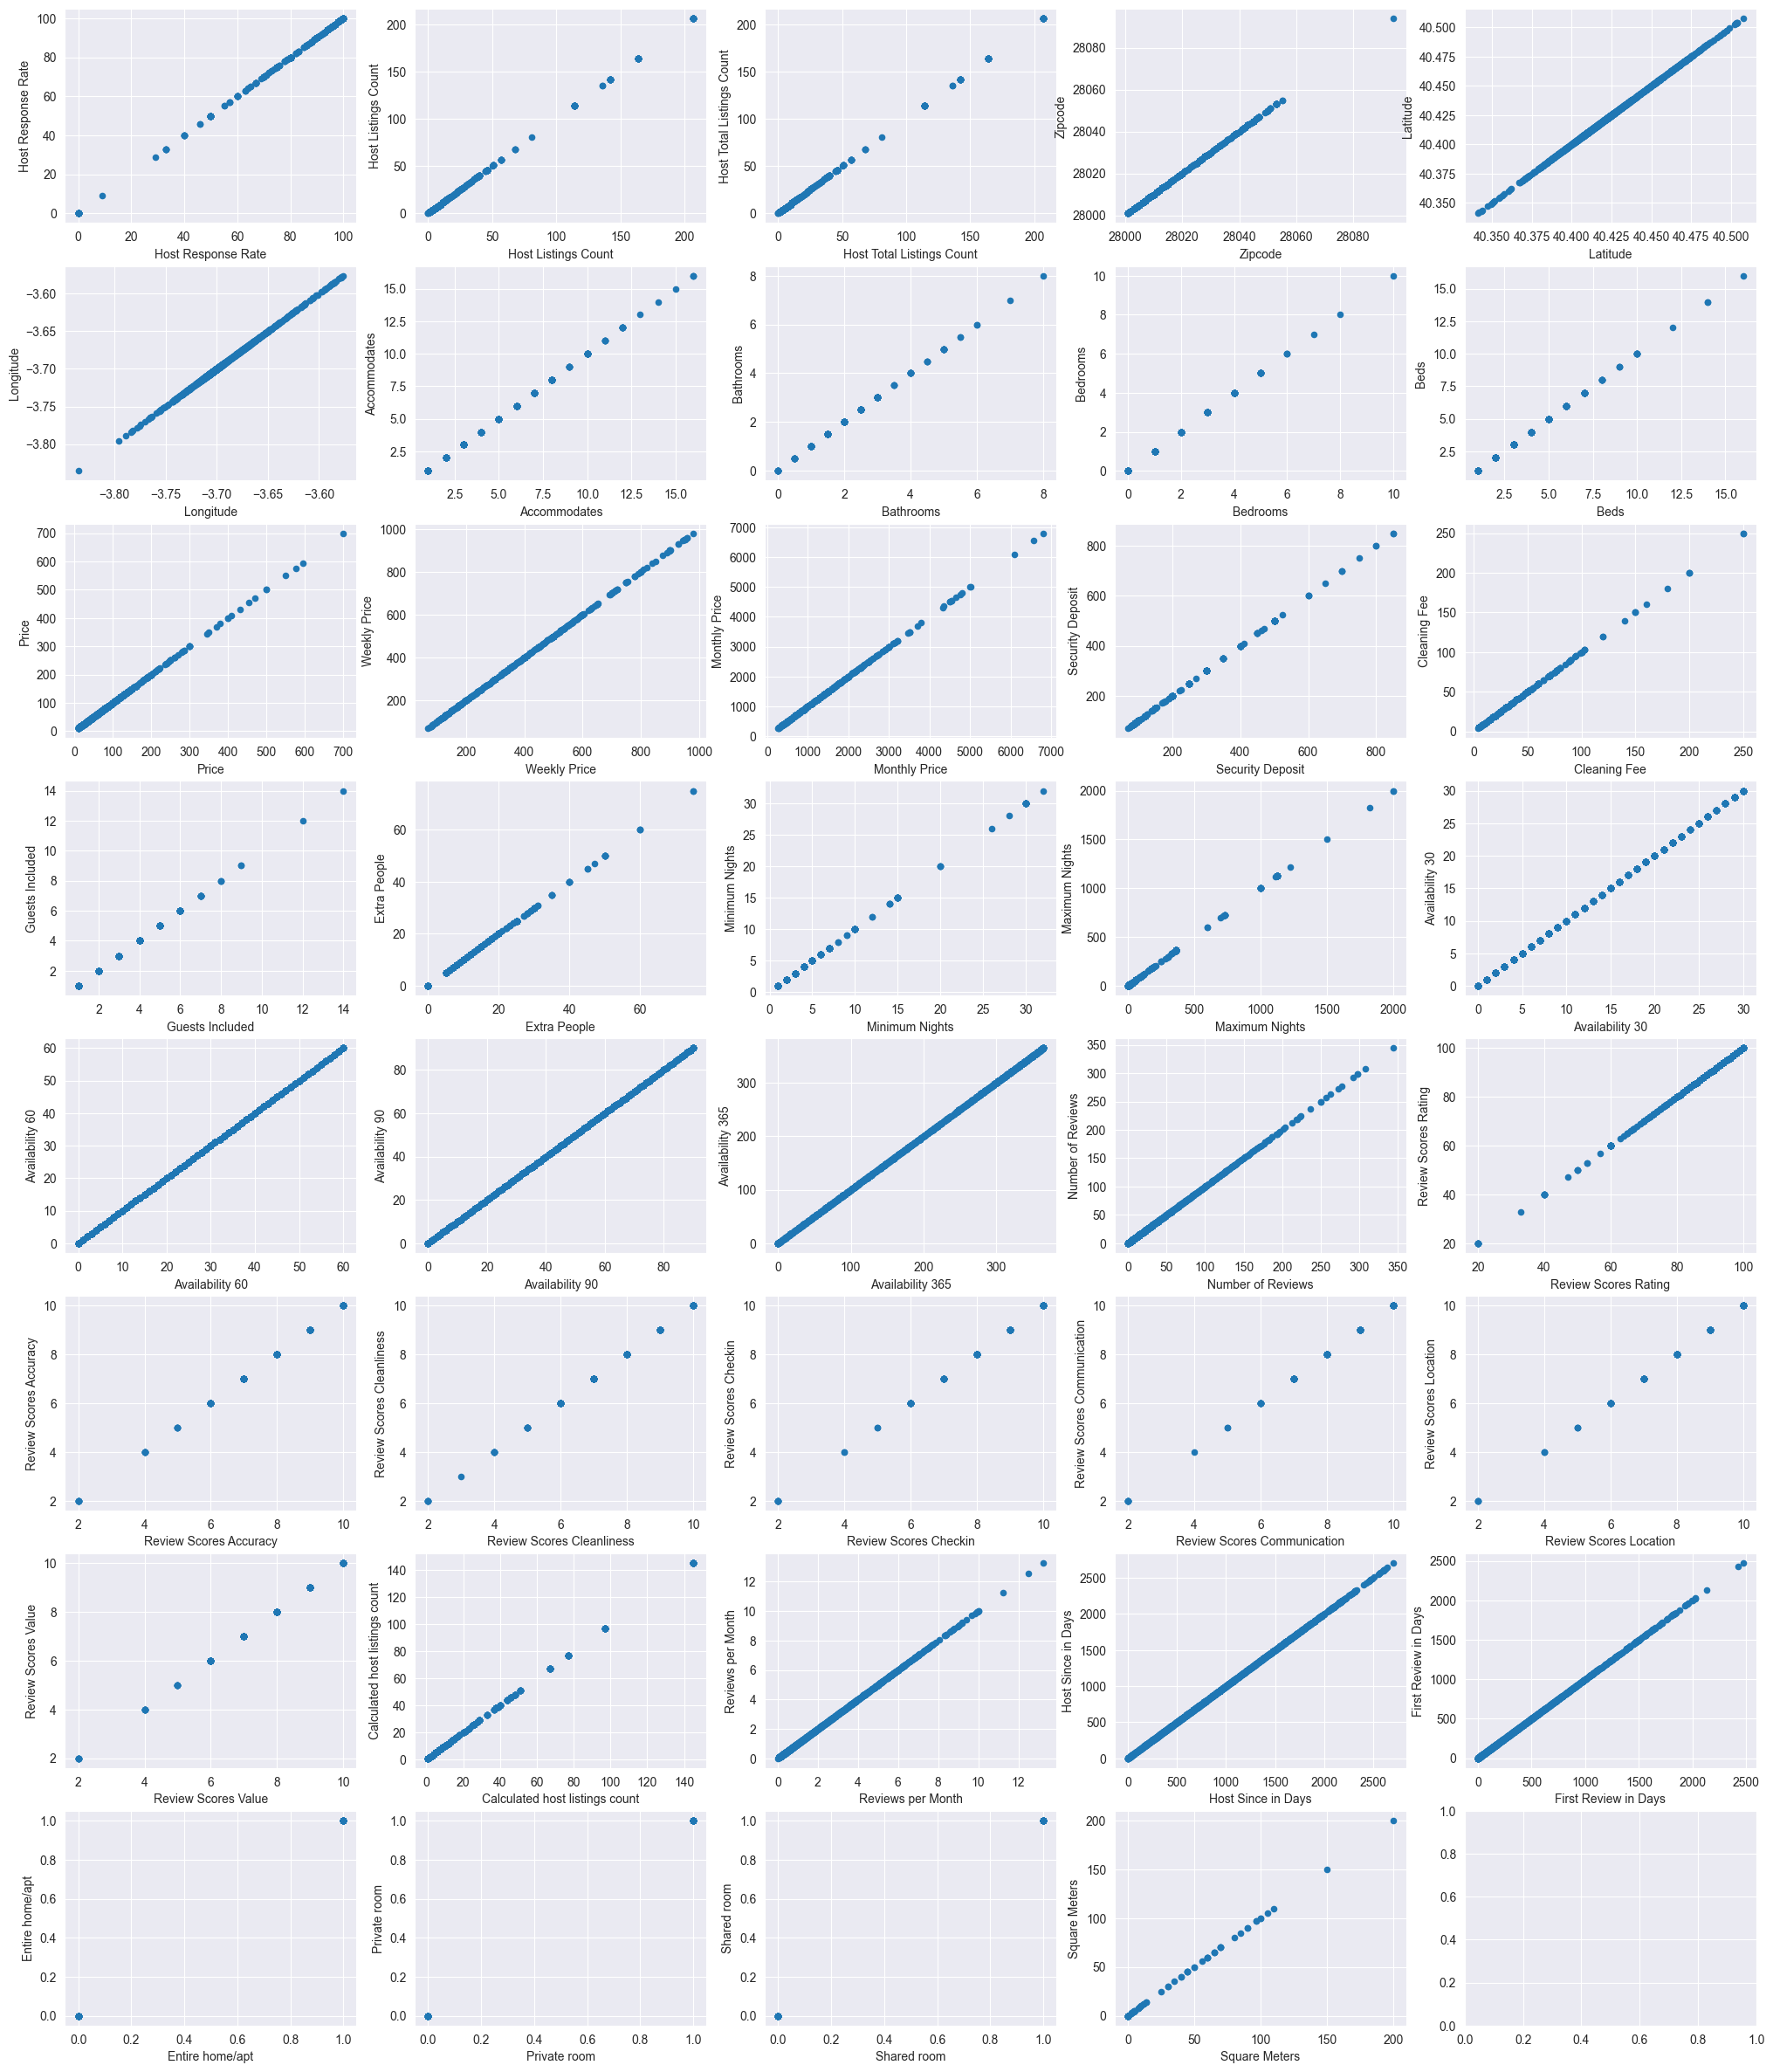

In [8]:
# Vamos a graficar cada columna en scatter para ver si hay outliers, lo vamos a mostrar en subplot
fig, ax = plt.subplots(8, 5, figsize=(25, 30))
for variable, subplot in zip(test_data.columns, ax.flatten()):
    test_data.plot(kind='scatter', x=variable, y=variable, ax=subplot)

#### Aplicamos las mismas operaciones que en train

In [9]:
# para la columna Zipcode vamos a reemplazar los outliers menores a 20000 por NaN
test_data['Zipcode'] = test_data['Zipcode'].apply(lambda x: np.nan if x < 20000 else x)

In [10]:
# Aplicamos el mismo reemplazo de 0 po NA
test_data['Square Meters'] = test_data['Square Meters'].apply(lambda x: np.nan if x == 0 else x)

<AxesSubplot: xlabel='Square Meters', ylabel='Price'>

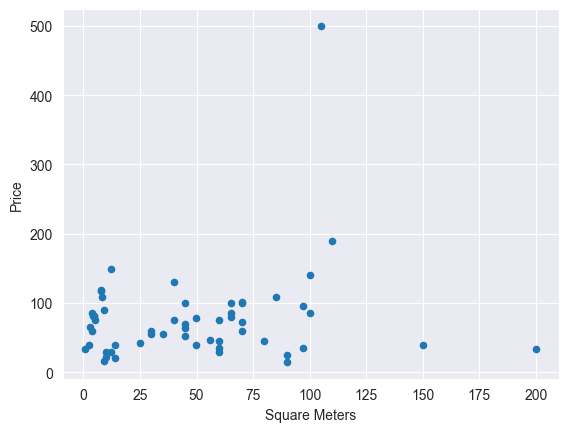

In [12]:
test_data.plot(kind='scatter', x='Square Meters', y='Price')

<AxesSubplot: xlabel='Square Meters', ylabel='Density'>

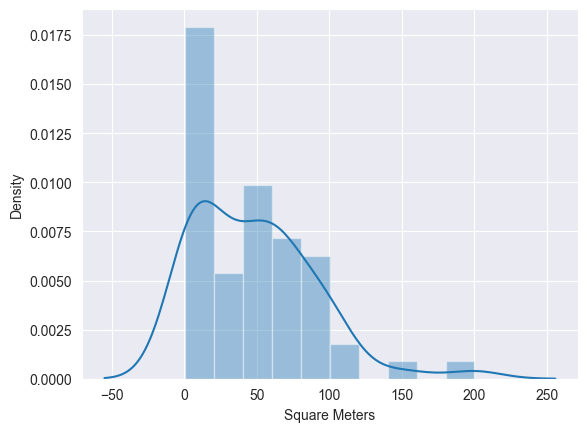

In [13]:
#### Por lo menos vemos en la grafica anterior que se parece a lo que teniamos en train.
sns.distplot(test_data['Square Meters'], hist=True, kde=True, bins=10)

<AxesSubplot: >

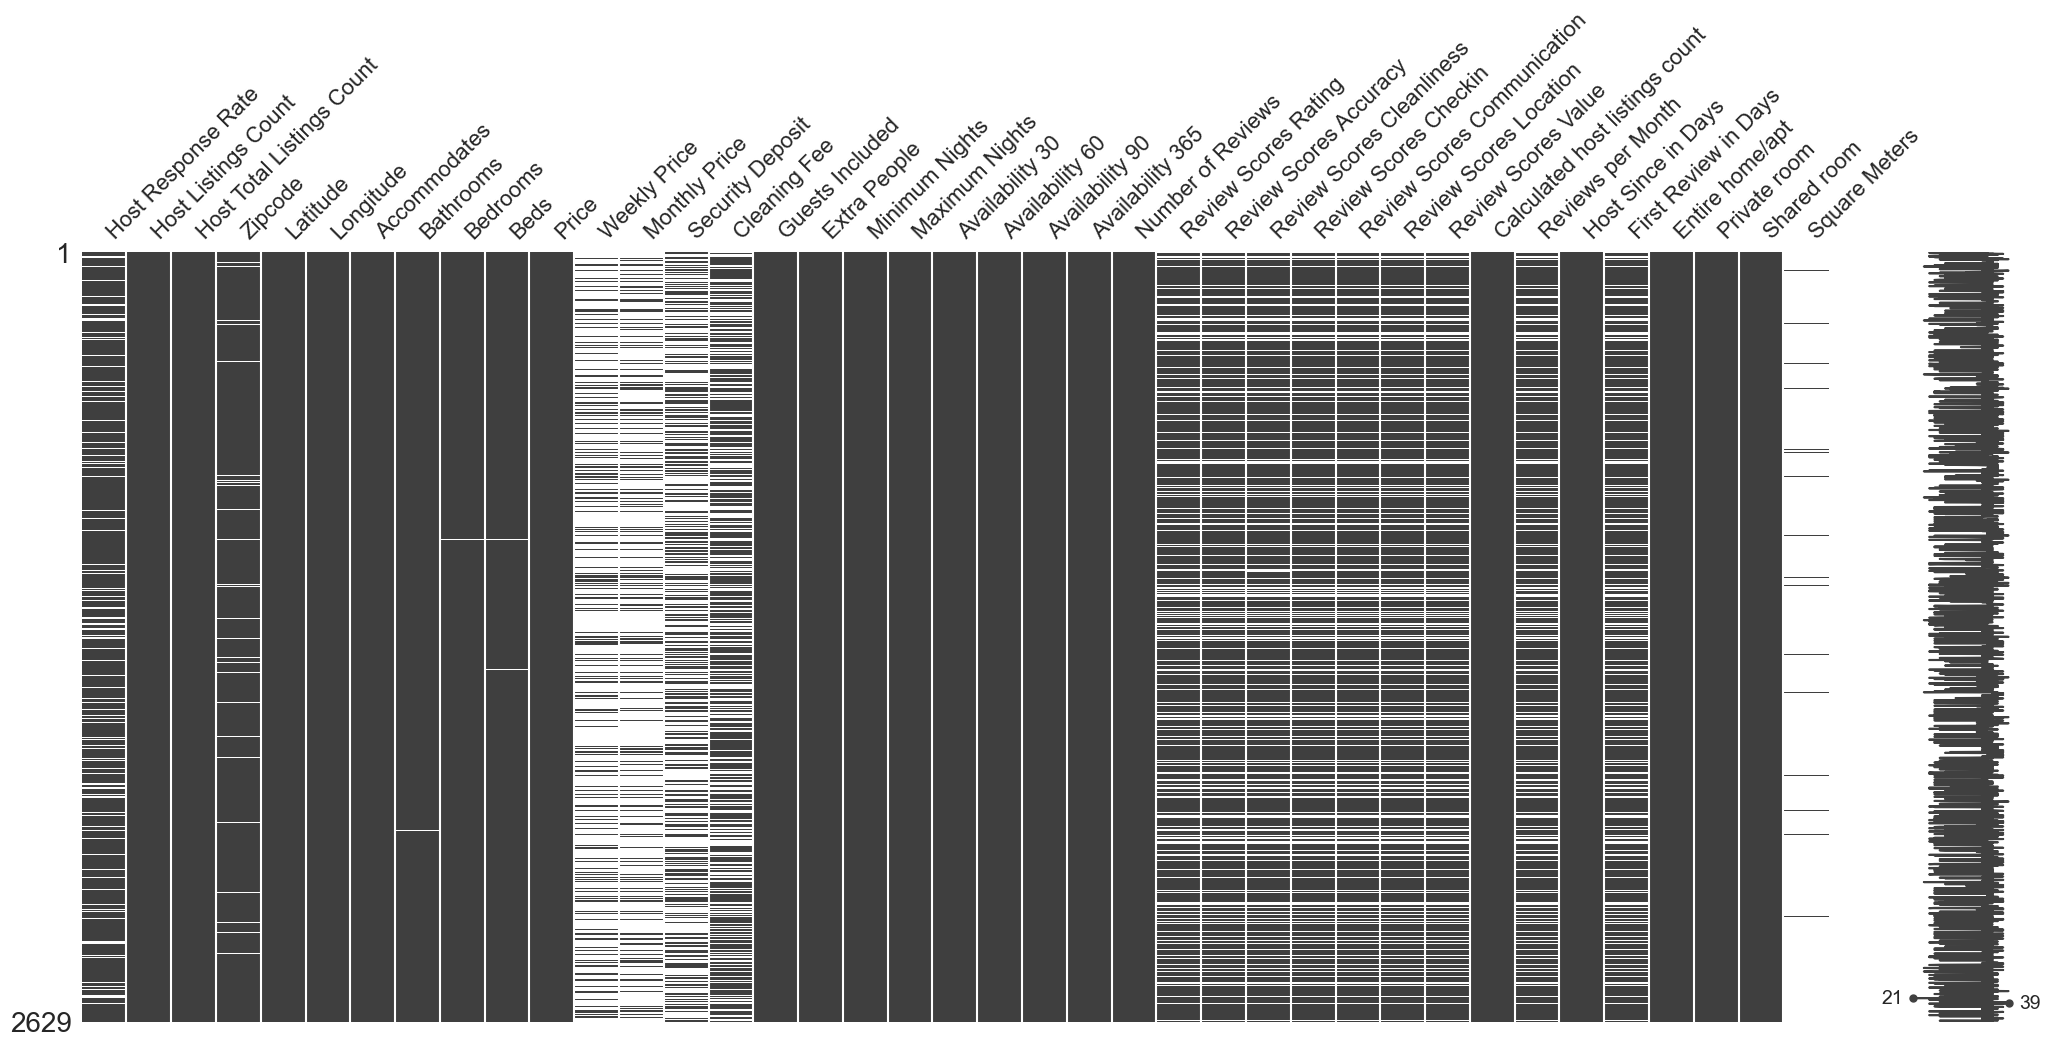

In [14]:
import missingno as msno

msno.matrix(test_data)

#### Viene lo mero bueno, vamos a comenzar a imputar como lo hicimos anteriormente

In [15]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Vamos a obtener la lista de los porcentajes de valores faltantes ordenados de menor a mayor, vamos a ir recuperando datos de forma escalonada
lista_columnas = test_data.isnull().sum().sort_values(ascending=True).index.tolist()
# Vamos a recorrer la lista y conforme lo hagamos vamos a ir imputando los valores faltantes
corr = np.abs(test_data.corr())
# Hacemos una copia de nuestro dataframe
df_for_imputation = test_data.copy()
for columna in lista_columnas:
    columnas_relacionadas = corr[columna].sort_values(ascending=False).index.tolist()
    # Tomamos las columnas que tienen una correlación mayor a .39
    columnas_relacionadas = [x for x in columnas_relacionadas if corr[columna][x] > .29]
    # Tomamos las columnas que no son la columna que estamos analizando
    # columnas_relacionadas = [x for x in columnas_relacionadas if x != columna]
    print(f'Evaluando la columna {columna} con las variables relacionadas: {columnas_relacionadas}')
    # Creamos un dataframe con las variables que queremos imputar
    df_knn = df_for_imputation.filter(columnas_relacionadas, axis=1).copy()
    # Normalizamos los datos
    df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)
    # Define KNN imputer and fill missing values
    knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
    df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)
    # Denormalize the data
    df_knn_imputed = pd.DataFrame(scaler.inverse_transform(df_knn_imputed), columns = df_knn_imputed.columns)
    # Asignamos los valores imputados a la variable original
    df_for_imputation[columna] = df_knn_imputed[columna]

Evaluando la columna Availability 30 con las variables relacionadas: ['Availability 30', 'Availability 60', 'Availability 90', 'Availability 365']
Evaluando la columna Availability 90 con las variables relacionadas: ['Availability 90', 'Availability 60', 'Availability 30', 'Availability 365']
Evaluando la columna Availability 60 con las variables relacionadas: ['Availability 60', 'Availability 90', 'Availability 30', 'Availability 365']
Evaluando la columna Shared room con las variables relacionadas: ['Shared room']
Evaluando la columna Maximum Nights con las variables relacionadas: ['Maximum Nights']
Evaluando la columna Minimum Nights con las variables relacionadas: ['Minimum Nights', 'Cleaning Fee', 'Square Meters']
Evaluando la columna Extra People con las variables relacionadas: ['Extra People', 'Guests Included', 'Accommodates']
Evaluando la columna Guests Included con las variables relacionadas: ['Guests Included', 'Accommodates', 'Beds', 'Bedrooms', 'Extra People', 'Weekly Pric

<AxesSubplot: xlabel='Square Meters', ylabel='Density'>

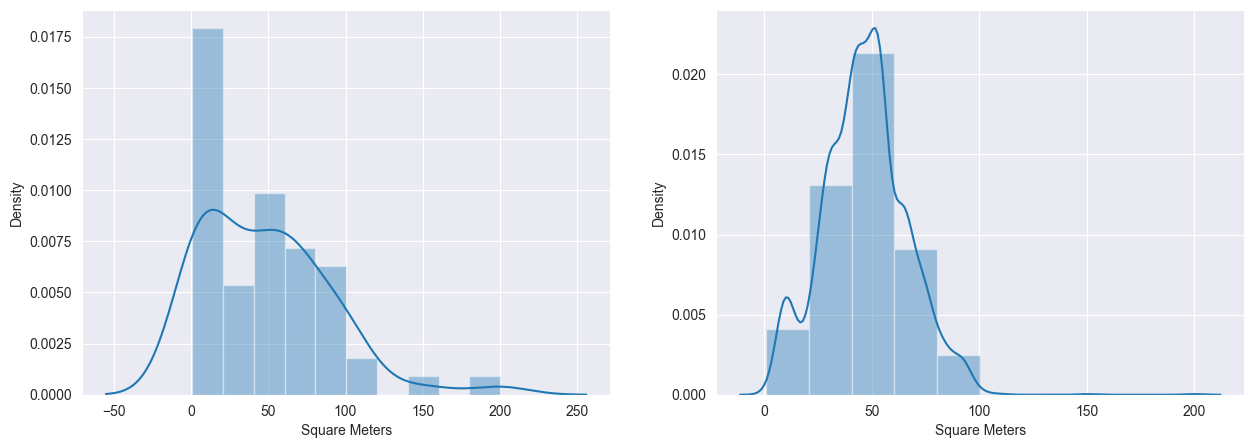

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# Calculamos la similitud enntre la distribución de los datos originales y los datos imputados
sns.distplot(test_data['Square Meters'], hist=True, kde=True, bins=10, ax=ax[0])
sns.distplot(df_for_imputation['Square Meters'], hist=True, kde=True, bins=10, ax=ax[1])

#### Si que nos cambió bastante el asunto, pero vamos a ver que nos encontramos

In [17]:
## Tomamos solamente las variables que elegimos mediante random forest
import pickle
selected_features = []
with open('selected_features.pkl', 'rb') as infile:
    selected_features = pickle.load(infile)
selected_features

['bathrooms',
 'bedrooms',
 'accommodates',
 'cleaning_fee',
 'entire_home/apt',
 'private_room',
 'beds',
 'guests_included',
 'monthly_price',
 'zipcode',
 'security_deposit',
 'longitude',
 'latitude',
 'host_since_in_days',
 'weekly_price',
 'availability_90',
 'availability_60',
 'host_total_listings_count',
 'availability_365',
 'availability_30']

#### Cargamos nuestro dataset train

In [18]:
train_reduced = pd.read_csv("./train_reduced.csv", sep=';') # cargamos fichero
df_for_imputation = df_for_imputation.dropna()
df_for_imputation.columns = df_for_imputation.columns.str.replace(' ', '_').str.lower()
## Seleccionamos las caracteristicas que vamos a obtener
selected_features.append('price')
test_reduced = df_for_imputation[selected_features] # el dataset imputado es nuestro test
X_train = train_reduced.values[:, :-1]
y_train = train_reduced.values[:, -1]
X_test = test_reduced.values[:, :-1]
y_test = test_reduced.values[:, -1]
test_reduced.head()

,bathrooms,bedrooms,accommodates,cleaning_fee,entire_home/apt,private_room,beds,guests_included,monthly_price,zipcode,...,longitude,latitude,host_since_in_days,weekly_price,availability_90,availability_60,host_total_listings_count,availability_365,availability_30,price
0,1.0,1.0,2.0,25.0,1.0,0.0,1.0,1.0,1880.2,28004.0,...,-3.703841,40.425330,896.0,464.8,4.0,1.0,2.0,192.0,1.0,42.0
1,1.0,1.0,2.0,38.0,0.0,1.0,1.0,1.0,1652.0,28019.0,...,-3.708362,40.392494,278.0,372.0,81.0,51.0,1.0,81.0,21.0,25.0
2,1.5,1.0,3.0,25.8,1.0,0.0,1.0,1.0,1796.0,28023.0,...,-3.795734,40.468014,1709.0,479.0,0.0,0.0,1.0,0.0,0.0,70.0
3,2.0,2.0,3.0,35.0,1.0,0.0,2.0,2.0,1200.0,28033.0,...,-3.663459,40.481546,1035.0,450.0,0.0,0.0,1.0,0.0,0.0,79.0
4,1.0,0.0,3.0,35.0,1.0,0.0,1.0,2.0,1395.0,28012.0,...,-3.701552,40.415075,720.0,565.0,18.0,11.0,6.0,211.0,7.0,70.0


### Aplicamos SVM a ver que tal nos va

In [19]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [20]:
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled  = scaler.transform(X_test)

In [21]:
from sklearn.svm import SVR

# Paso 2:
vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(XtrainScaled, y_train)



Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ................................C=0.01, gamma=1e-05; total time=   7.3s
[CV] END ................................C=0.01, gamma=1e-05; total time=   6.4s
[CV] END ................................C=0.01, gamma=1e-05; total time=   6.2s
[CV] END ................................C=0.01, gamma=1e-05; total time=   6.5s
[CV] END ................................C=0.01, gamma=1e-05; total time=   6.3s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   6.3s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   6.1s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   6.4s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   6.2s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   6.1s
[CV] END ................C=0.01, gamma=0.0005179474679231213; total time=   6.1s
[CV] END ................C=0.01, gamma=0.000517

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'gamma': array([1.00000000e-05, 7.19685673e-05, 5.17947468e-04, 3.72759372e-03,
       2.68269580e-02, 1.93069773e-01, 1.38949549e+00, 1.00000000e+01])},
             verbose=2)

#### Tomamos las configuraciones de la clase para observar un poco sobre el espacio de busqueda

best mean cross-validation score: 0.591
best parameters: {'C': 100.0, 'gamma': 0.026826957952797246}
Log de los best params. C: 2.0 Gamma: -1.5714285714285716


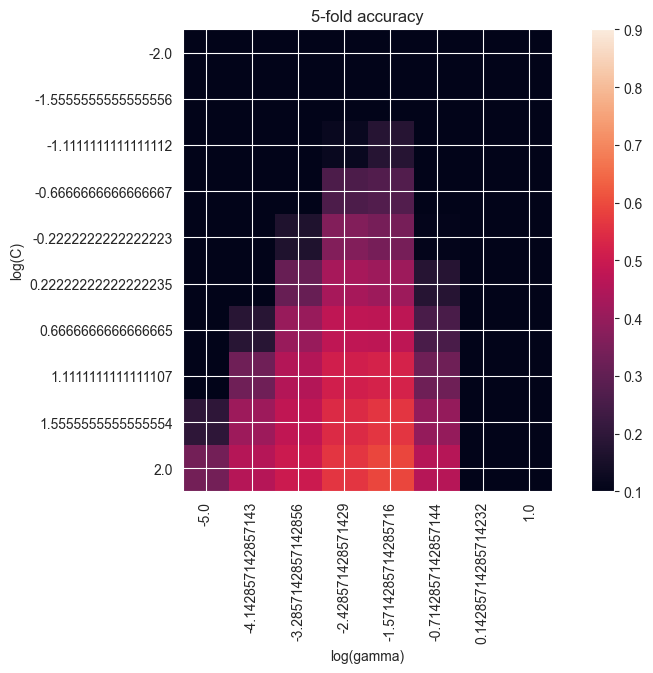

In [24]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print(f'Log de los best params. C: {np.log10(grid.best_params_["C"])} Gamma: {np.log10(grid.best_params_["gamma"])}')

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.1, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()


#### Podemos observar que el optimo esta muy por debajo de lo que esperamos

#### Revisamos a ver la barbaridad que nos dio

In [23]:
# Paso 3:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtrainScaled,y_train)
print('Acc (TEST): %0.2f'%svmModel.score(XtestScaled,y_test))

Acc (TEST): 0.56
